<a href="https://colab.research.google.com/github/mostafizur1997/Deep-Learning/blob/main/03_Computer_Vision_and_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network and Computer vision with Tensorflow

# What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
  * Becoming one with the data
  * Preparing data for modelling
  * Creating a CNN model (starting with a baseline)
  * Fitting a model (getting it to find patterns in our data)
  * Evaluating a model
  * Improving a model
  * Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)

# Get the data

In [1]:
import zipfile

#Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref =zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-03-01 16:38:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.9MB/s    in 5.4s    

2023-03-01 16:38:46 (19.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#Inspect the data(become one with it)


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number f files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'.")

There are 2 directories and 0 images in'pizza_steak'.
There are 2 directories and 0 images in'pizza_steak/test'.
There are 0 directories and 250 images in'pizza_steak/test/steak'.
There are 0 directories and 250 images in'pizza_steak/test/pizza'.
There are 2 directories and 0 images in'pizza_steak/train'.
There are 0 directories and 750 images in'pizza_steak/train/steak'.
There are 0 directories and 750 images in'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train =len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") #turn our training path into a python path
class_names =np.array(sorted([item.name for item in data_dir.glob('*')])) #created a classnames from the subdirectories 
print(class_names)

['pizza' 'steak']


Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize. We are trying to visualize as much as possible.

#**For viewing an image you have to follow some steps:**


---



---


  
  
  * setup target directory(we'll view image from here)
  * Get a random image path
  * read in the image and plot it using matplotlib
  * show the shape of the image

In [8]:
#view an image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup target directory(we'll view image from here)
  target_folder = target_dir + target_class 

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img



Image shape: (384, 512, 3)


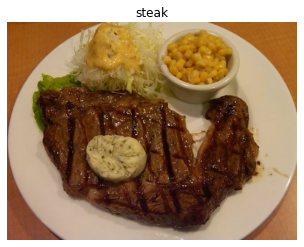

In [9]:
# view a random image from the training datasets
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="steak" )

In [10]:
#view the img(actually just a big array/tensor)
img

array([[[133,  67,   9],
        [134,  68,  10],
        [133,  67,   7],
        ...,
        [168,  98,  26],
        [169,  99,  27],
        [170, 100,  28]],

       [[134,  68,  10],
        [136,  70,  10],
        [135,  69,   9],
        ...,
        [166,  96,  24],
        [168,  98,  26],
        [169,  99,  27]],

       [[136,  70,  10],
        [138,  72,  12],
        [137,  71,  11],
        ...,
        [164,  94,  22],
        [166,  96,  24],
        [168,  98,  26]],

       ...,

       [[142,  74,  61],
        [142,  75,  59],
        [142,  75,  59],
        ...,
        [180, 121,  79],
        [182, 123,  81],
        [184, 125,  83]],

       [[139,  72,  56],
        [140,  73,  57],
        [140,  73,  57],
        ...,
        [179, 120,  80],
        [180, 121,  79],
        [181, 122,  80]],

       [[137,  70,  54],
        [138,  71,  55],
        [138,  71,  54],
        ...,
        [179, 120,  80],
        [181, 122,  80],
        [182, 123,  81]]

In [11]:
#view the image shape
img.shape #returns width, height, colur channels

(384, 512, 3)

In [12]:
#Get all the pixel values between 0 & 1
img/255.

array([[[0.52156863, 0.2627451 , 0.03529412],
        [0.5254902 , 0.26666667, 0.03921569],
        [0.52156863, 0.2627451 , 0.02745098],
        ...,
        [0.65882353, 0.38431373, 0.10196078],
        [0.6627451 , 0.38823529, 0.10588235],
        [0.66666667, 0.39215686, 0.10980392]],

       [[0.5254902 , 0.26666667, 0.03921569],
        [0.53333333, 0.2745098 , 0.03921569],
        [0.52941176, 0.27058824, 0.03529412],
        ...,
        [0.65098039, 0.37647059, 0.09411765],
        [0.65882353, 0.38431373, 0.10196078],
        [0.6627451 , 0.38823529, 0.10588235]],

       [[0.53333333, 0.2745098 , 0.03921569],
        [0.54117647, 0.28235294, 0.04705882],
        [0.5372549 , 0.27843137, 0.04313725],
        ...,
        [0.64313725, 0.36862745, 0.08627451],
        [0.65098039, 0.37647059, 0.09411765],
        [0.65882353, 0.38431373, 0.10196078]],

       ...,

       [[0.55686275, 0.29019608, 0.23921569],
        [0.55686275, 0.29411765, 0.23137255],
        [0.55686275, 0

#**Architecture of convulational neural network:**:

---



---


  
* Components of a convulational neural network:



  * Input image(s)->	Target images you'd like to discover patterns in->	Whatever  you can take a photo (or video) of
  
  * Input layer->	Takes in target images and preprocesses them for further layers-> input_shape = [batch_size, image_height, image_width, color_channels]
  
  * Conlution layer->	Extracts/learns the most important features from target images-> Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)

  * Hidden activation->	Adds non-linearity to learned features (non-straight lines)	Usually ReLU (tf.keras.activations.relu)

  * Pooling layer->	Reduces the dimensionality of learned image features	Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)

  * Fully connected layer->	Further refines learned features from convolution layers	tf.keras.layers.Dense

  * Output layer->	Takes learned features and outputs them in shape of target labels	output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)

  * Output activation->	Adds non-linearities to output layer	tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax

# An end to end example
we are using the arcthiteure in below VGG-16

we will cover in the below:
  * import library
  * set the seed 
  * Preprocess the data (get all of the pixel values between 0 and 1, also called scalling and normalization)
  * setup the train and test directories
  * import data from directories and turn into batches
  * Create a CNN model (same as Tiny VGG)
  * Compile the model
  * Fit the model


In [13]:
#Import Library 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess the data (get all of the pixel values between 0 and 1, also called scalling and normalization)
train_datagen = ImageDataGenerator(rescale= 1/255.)
valid_datagen = ImageDataGenerator(rescale= 1/255.)

#setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size =32,
                                               target_size =(224,224),
                                               class_mode ='binary',
                                               seed =42
                                               )

valid_data = valid_datagen.flow_from_directory(test_dir, 
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode ='binary',
                                             seed =42
                                             )
#Create a CNN model (same as Tiny VGG)
model_1 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters= 10,
        kernel_size =3, #can also be (3,3)
        activation= "relu",
        input_shape=(224,224,3)), #first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size =2,
                           padding ="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"), #binary activation output
])

#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#Fit the model
history_1 =model_1.fit(train_data, 
                       epochs =5,
                       validation_data=valid_data,
                       validation_steps= len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 274ms/step - loss: 0.6664 - accuracy: 0.6060 - val_loss: 0.4679 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4801 - accuracy: 0.7820 - val_loss: 0.4419 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.4318 - accuracy: 0.8120 - val_loss: 0.3607 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 223ms/step - loss: 0.4118 - accuracy: 0.8320 - val_loss: 0.3676 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3374 - accuracy: 0.8607 - val_loss: 0.3715 - val_accuracy: 0.8280


In [14]:
#Check out the layers in our model

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#Using the same model as before
we will do here:
  * set random seed 
  * create a model to replicate the tensorflow 
  * compile the model
  * fit the model
  

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 1.0442 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
#check out our second 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
#set random seed 
tf.random.set_seed(42)

#create a model similar to model_1 but add an extra layer and increase the number of hidden units 
model_3 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # dense layers expect a 1-dimentional vector as input
    tf.keras.layers.Dense(100, activation='relu'),# add one extra layers and increase the neurons into 4 to 100
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 203ms/step - loss: 2.6397 - accuracy: 0.6493 - val_loss: 0.6441 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.7851 - accuracy: 0.7133 - val_loss: 1.4006 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.8672 - accuracy: 0.7047 - val_loss: 0.6177 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6173 - accuracy: 0.7493 - val_loss: 0.4668 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4685 - accuracy: 0.7967 - val_loss: 0.7157 - val_accuracy: 0.6700


In [18]:
#check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#Binary Classification


---
**STEPS:**

* Become one with the data (visualize, visualize, visualize...)

* Preprocess the data (prepare it for a model)

* Create a model (start with a baseline)

* Fit the model

* Evaluate the model

* Adjust different parameters and improve model (try to beat your baseline)

* Repeat until satisfied


# 1. Import and become one with the data
it is good idea to visualizg 10 to 100 samples to know about the data  

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


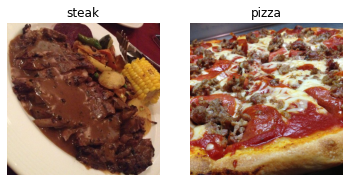

In [19]:
# Visualize data (requires function 'view_random_images)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img =view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data(prepare it for a model)

In [20]:
#define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [21]:
#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
#Turn it into batches
train_data = train_datagen.flow_from_directory(directory =train_dir,
                                               target_size= (224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size =(224,224),
                                             class_mode='binary',
                                             batch_size =32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
#Get a sample of the training data batch
images, labels = train_data.next() #get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

#Create a model (start with a baseline)

In [26]:
# Making the model with an easier way 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
#create the model with a 3 layer convulutional neural network
from keras.layers.serialization import activation
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape = (224,224,3)), #input layer

  Conv2D(10,3, activation='relu'),
  Conv2D(10,3, activation= 'relu'),
  Flatten(),
  Dense(1, activation ='sigmoid') # output layer (specify output shape)
])

In [28]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer =Adam(),
                metrics =['accuracy'])

#Fit the Model

* Steps_per_epoch 1500/32
* 1500/32 =47 steps
* validation steps 500/32

In [29]:
#check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [30]:
from numpy.ma import test
#Fit the model
history_4 =model_4.fit(train_data,
                       epochs =5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 223ms/step - loss: 1.0722 - accuracy: 0.6173 - val_loss: 0.4608 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4297 - accuracy: 0.8133 - val_loss: 0.4259 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3340 - accuracy: 0.8747 - val_loss: 0.3898 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.2183 - accuracy: 0.9267 - val_loss: 0.3661 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.1263 - accuracy: 0.9653 - val_loss: 0.3852 - val_accuracy: 0.8340


# Evaluate the model

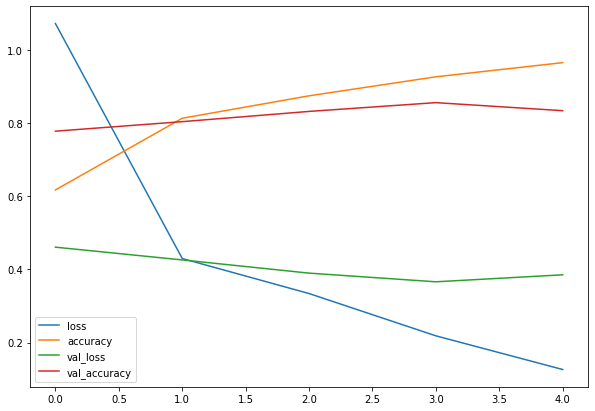

In [31]:
#plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize =(10,7));

In [32]:
#plot the validation and training data separately
def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
     



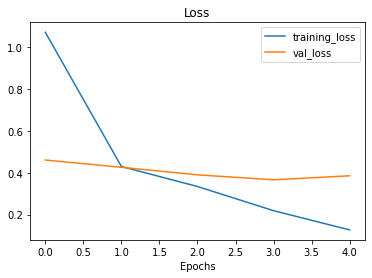

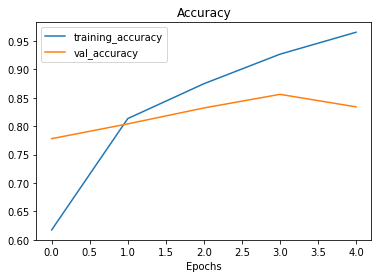

In [33]:

# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#Adjust the model parameters

In [35]:
#Create the model (a 3 layer convolutional neural network)
model_5= Sequential([
    Conv2D(10,3,activation='relu',input_shape =(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [36]:
#Compile model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
#Fit the model
history_5=model_5.fit(
        train_data,
        epochs=5,
        steps_per_epoch =len(train_data),
        validation_data = test_data,
        validation_steps = len(test_data)
    )

Epoch 1/5
47/47 [==============================] - 12s 215ms/step - loss: 0.6117 - accuracy: 0.6587 - val_loss: 0.5005 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4711 - accuracy: 0.7887 - val_loss: 0.3790 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4117 - accuracy: 0.8127 - val_loss: 0.3393 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3944 - accuracy: 0.8307 - val_loss: 0.3360 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3728 - accuracy: 0.8347 - val_loss: 0.3257 - val_accuracy: 0.8620


In [38]:
#check out the model
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

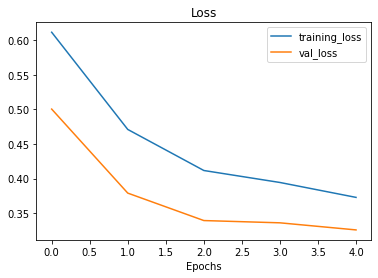

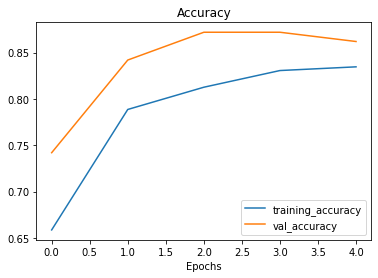

In [39]:
#plot loss curves of model_5 results 
plot_loss_curves(history_5)

In [40]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale =1/255.,
                                             rotation_range =20,
                                             shear_range =0.2, 
                                             zoom_range =0.2,
                                             width_shift_range =0.2,
                                             height_shift_range =0.2,
                                             horizontal_flip= True
                                             )

#create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale =1/255.)

#create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale= 1/255.)


In [41]:
#Import data and augment it from training directory
print("Augmented training images: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size =(224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle =False
                                                                   )

#create non- augmented  data batches
print("Non-augmented training images")
train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size =(224,224),
                                               batch_size =32,
                                               shuffle = False
                                               )

print("Unchanged test images: ")
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode ='binary'
                                            )

Augmented training images: 
Found 1500 images belonging to 2 classes.
Non-augmented training images
Found 500 images belonging to 2 classes.
Unchanged test images: 
Found 500 images belonging to 2 classes.


In [42]:
#Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

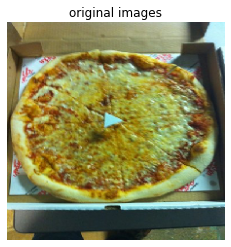

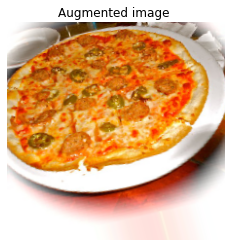

In [43]:
#show original images and augmented image
random_number = random.randint(0,32) #we are making batches of size 32
plt.imshow(images[random_number])
plt.title(f"original images")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image ")
plt.axis(False);

#we will use the same model as model_5
#Create model_6 withchanged the augmented train data

In [44]:
#create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3, activation= 'relu', input_shape =(224,224,3)),
    MaxPool2D(pool_size=2), #reduce number of feature by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy']
                )

#Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 484ms/step - loss: 0.7081 - accuracy: 0.4573 - val_loss: 0.6922 - val_accuracy: 0.5420
Epoch 2/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6937 - accuracy: 0.5267 - val_loss: 0.6866 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 23s 499ms/step - loss: 0.6839 - accuracy: 0.5967 - val_loss: 0.6461 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 23s 497ms/step - loss: 0.6554 - accuracy: 0.6520 - val_loss: 0.5688 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6998 - accuracy: 0.6347 - val_loss: 0.6606 - val_accuracy: 0.5760


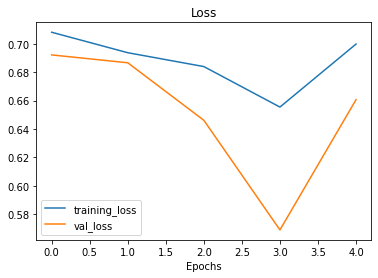

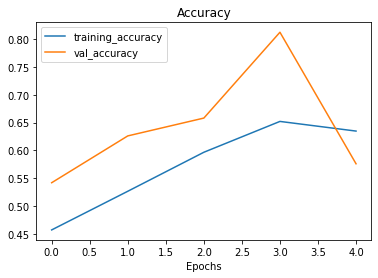

In [45]:
#check model's performance history training on augmented data
plot_loss_curves(history_6)

In [46]:
#import data and augmented it form directories
train_data_augmented_shuffled =train_datagen_augmented. flow_from_directory(train_dir,
                                                                            target_size =(224,224),
                                                                            batch_size =32,
                                                                            shuffle =True
                                                                            ) #shuffle data

Found 1500 images belonging to 2 classes.


In [47]:
model_7 = Sequential([
    Conv2D(10,3, activation= 'relu', input_shape =(224,224,3)),
    MaxPool2D(pool_size=2), #reduce number of feature by half
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics =['accuracy']
                )

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 485ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.4760
Epoch 2/5
47/47 [==============================] - 23s 492ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4460
Epoch 3/5
47/47 [==============================] - 23s 491ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4880
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


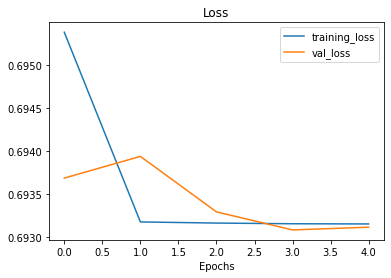

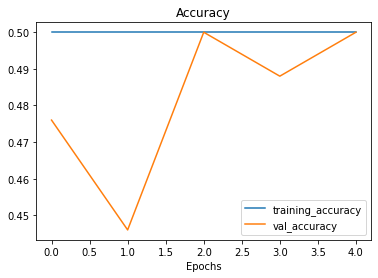

In [49]:
#check the model performance 
plot_loss_curves(history_7)

#Repeat until satisfied

In [51]:
# Create a CNN model (same as Tiny VGG but for binary classification
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 603ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4720
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4620
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 4/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4520
Epoch 5/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4520


In [52]:
#check model_1 architecture same as model_8
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [53]:
#check model_8 same as model_1
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

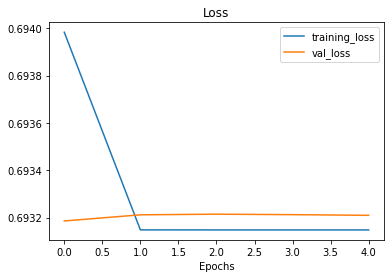

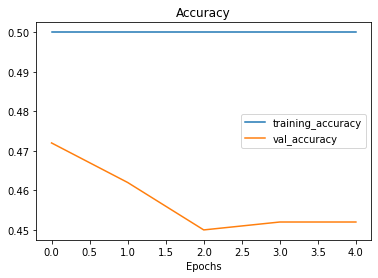

In [54]:
#check TinyVGG model performance for history_8
plot_loss_curves(history_8)

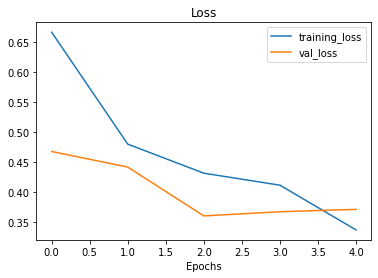

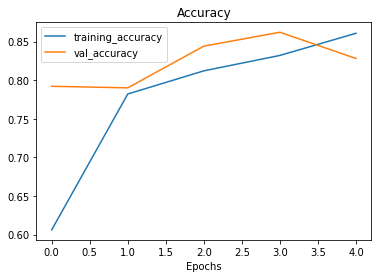

In [55]:
#training curves more compared to the one above?
plot_loss_curves (history_1)

# Making prediction with train model


In [56]:
#view classes 
print(class_names)

['pizza' 'steak']


--2023-03-01 17:04:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2023-03-01 17:04:19 (163 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



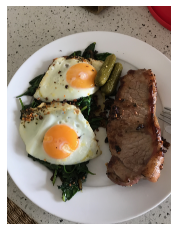

In [57]:
#view example images 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [58]:
#check the shape
steak.shape

(4032, 3024, 3)

 
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).


In [61]:
# create a function to import an image and resize it 
def load_and_prep_image(filename, img_shape=224):
 
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [63]:
#load in and preprocess our data 
steak=load_and_prep_image('03-steak.jpeg')

In [64]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
#it won't work bcz we're still missing a dimension.
model_8.predict(steak)

ValueError: ignored

In [67]:
# using tf.expand_dims
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [68]:
# prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 179ms/step


array([[0.5002723]], dtype=float32)

In [70]:
#our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.

In [71]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


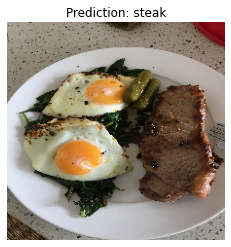

In [72]:
#test our model 
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-03-01 17:15:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-03-01 17:15:06 (236 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 50ms/step


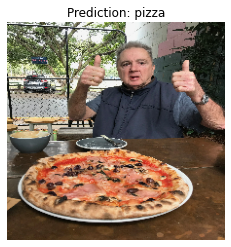

In [73]:
# Download and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)